# __This is my data analysis final project we are analysing data from the NICS system about the number of checks going back up to 1998.__

__We would check how:__

__1. How an increase in the population from 2010 to 2016 correlated to an increase in permit checks__

__2. Do states with more veterans tend to have higher gun checks?__ 

__3. How does sales correlate with the number of gun checks__

__4. What of where there are a higher number of companies, because that means more people would be employed.__


__We begin by importing the necessary modules,
numpy and pandas for calulations and matplotlib and seaborn for the visulisations.__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next we import the data using pandas and edit it into a useable format removing unnecesary columms, this is the data wrangling phrase.
We also set seaborn as the default to import the quality of the plots.

In [3]:
gun_data = pd.read_excel('gun_data.xlsx')
census_data = pd.read_csv('U.S. Census Data.csv')

# remove the 'Fact Note' column and the descreptive data.
census_data.drop('Fact Note', inplace=True, axis=1)
census_data.drop(census_data.index[65:], inplace=True, axis=0)

# Set each month as the index of gun_data.
gun_data.set_index(['month', 'state'], inplace=True)

# And the  name of each fact like the population as the index of census_data.
census_data.set_index('Fact', inplace=True)

# We then refrence the index of the census_data in a variable to make it easy to get them.
index_of_census = census_data.index

# We use cenus_data to get all the us states.
states = census_data.columns

# Set seaborn defaults for the visualizations
sns.set()

We then put the number of checks each year in a Pandas Dataframe and drop year 2017 because the data is incomplete for that year.

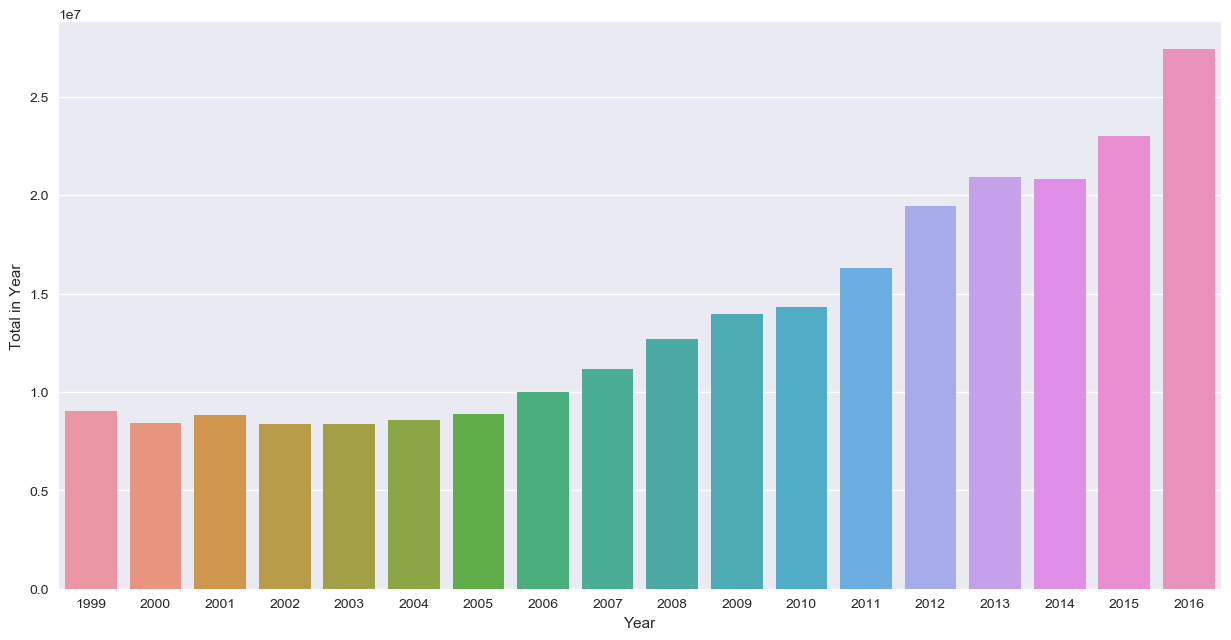

In [19]:
months=np.array(['2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04', '2017-03', '2017-02', '2017-01', '2016-12',
        '2016-11', '2016-10', '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04', '2016-03', '2016-02',
        '2016-01', '2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07', '2015-06', '2015-05', '2015-04',
        '2015-03', '2015-02', '2015-01', '2014-12', '2014-11', '2014-10', '2014-09', '2014-08', '2014-07', '2014-06',
        '2014-05', '2014-04', '2014-03', '2014-02', '2014-01', '2013-12', '2013-11', '2013-10', '2013-09', '2013-08',
        '2013-07', '2013-06', '2013-05', '2013-04', '2013-03', '2013-02', '2013-01', '2012-12', '2012-11', '2012-10',
        '2012-09', '2012-08', '2012-07', '2012-06', '2012-05', '2012-04', '2012-03', '2012-02', '2012-01', '2011-12',
        '2011-11','2011-10', '2011-09', '2011-08', '2011-07', '2011-06', '2011-05', '2011-04', '2011-03', '2011-02',
        '2011-01', '2010-12', '2010-11', '2010-10', '2010-09', '2010-08', '2010-07', '2010-06', '2010-05', '2010-04',
        '2010-03', '2010-02', '2010-01', '2009-12', '2009-11', '2009-10', '2009-09', '2009-08', '2009-07', '2009-06',
        '2009-05', '2009-04', '2009-03', '2009-02', '2009-01', '2008-12', '2008-11', '2008-10', '2008-09', '2008-08',
        '2008-07', '2008-06', '2008-05', '2008-04', '2008-03', '2008-02', '2008-01', '2007-12', '2007-11', '2007-10',
        '2007-09', '2007-08', '2007-07', '2007-06', '2007-05', '2007-04', '2007-03', '2007-02', '2007-01', '2006-12',
        '2006-11', '2006-10', '2006-09', '2006-08', '2006-07', '2006-06', '2006-05', '2006-04', '2006-03', '2006-02',
        '2006-01', '2005-12', '2005-11', '2005-10', '2005-09', '2005-08', '2005-07', '2005-06', '2005-05', '2005-04',
        '2005-03', '2005-02', '2005-01', '2004-12', '2004-11', '2004-10', '2004-09', '2004-08', '2004-07', '2004-06',
        '2004-05', '2004-04', '2004-03', '2004-02', '2004-01', '2003-12', '2003-11', '2003-10', '2003-09', '2003-08',
        '2003-07', '2003-06', '2003-05', '2003-04', '2003-03', '2003-02', '2003-01', '2002-12', '2002-11', '2002-10',
        '2002-09', '2002-08', '2002-07', '2002-06', '2002-05', '2002-04', '2002-03', '2002-02', '2002-01', '2001-12',
        '2001-11', '2001-10', '2001-09', '2001-08', '2001-07', '2001-06', '2001-05', '2001-04', '2001-03', '2001-02',
        '2001-01', '2000-12', '2000-11', '2000-10', '2000-09', '2000-08', '2000-07', '2000-06', '2000-05', '2000-04',
        '2000-03', '2000-02', '2000-01', '1999-12', '1999-11', '1999-10', '1999-09', '1999-08', '1999-07', '1999-06',
        '1999-05', '1999-04', '1999-03', '1999-02', '1999-01', '1998-12', '1998-11'])

years = np.array(['2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
         '2004', '2003', '2002', '2001', '2000', '1999', '1998'])

def total_in_year(year):
    '''gets the total number of checks each year'''
    total = 0
    for month in months:
        if str(year) in month:
            df_for_month = gun_data.loc[month]['totals']
            total += df_for_month
    return total

def create_year_df():
    '''creates a dataframe tor the total number of checks each year'''
    df = {}
    for year in years:
        df[year] = total_in_year(year)
    return pd.DataFrame(df)

checks_each_year = create_year_df()

checks_each_year.drop(['1998', '2017'], inplace=True, axis=1)

# We also need to remove states that are not in both datasets
for index in checks_each_year.index:
    if index not in census_data.columns:
        checks_each_year = checks_each_year.drop(index, axis=0)
'''        
# We then confirm how the number of gun checks have varied over the years using a barchart
plt.figure(figsize=(15.0, 7.5), dpi=100); checks_each_year.sum().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Amount of checks')
plt.title('Gun Checks, 199-2016')
plt.show()
'''
plt.figure(figsize=(15.0, 7.5), dpi=100)
total_in_year = checks_each_year.sum().reset_index()
total_in_year.rename(columns={'index':'Year', 0:'Total in Year'}, inplace=True)
sns.barplot(x='Year', y='Total in Year', data = total_in_year)

And we see that the number of gun checks has been increasing steadily over the years.

__We start by answering the first question,__
1. How an increase in the population from 2010 to 2016 correlated to an increase in permit checks

We first of all get the percentage change in population from year 2010 to 2016 and the percentage change in gun checks from year 2010 to 2016 and then combine that into a dataframe

In [4]:
# convert population change to number values

ppl_change = census_data.loc['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)']

def change_to_float(num_string):
    '''
    To be used with .apply(change_to_float)
    Takes percent values and converts them to floats while removing the % sign
    It deals with numbers such as '2.1%' or '0.0021'
    '''
    if type(num_string) != str:
        return float(num_string)
    else:
        if '%' not in num_string:
            percent_value = float(num_string) *100 # Since the values are strings, we need to convert them to floats.
        else:
            percent = num_string.strip('%')
            percent_value = float(percent)
        
        return percent_value

ppl_change = ppl_change.apply(change_to_float)

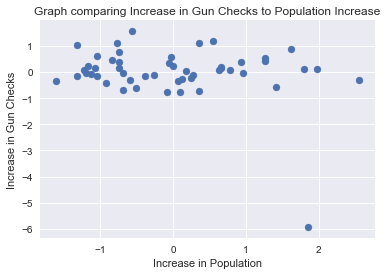

In [5]:
increase_in_checks = ((checks_each_year['2016'] - checks_each_year['2010'])/checks_each_year['2016']) *100
increase_in_checks.rename('Percentage incease in gun checks from 2010 to 2016', inplace=True)

percentage_changes = pd.concat([ppl_change, increase_in_checks], axis=1, join='inner')

def standardize(series):
    '''function to standardize a series'''
    return (series-series.mean())/series.std(ddof=0)

percentage_changes = percentage_changes.apply(standardize, axis = 0)

plt.figure(); plot = plt.scatter(percentage_changes.iloc[:,0], percentage_changes.iloc[:,1])
plt.xlabel('Increase in Population')
plt.ylabel('Increase in Gun Checks')
plt.title('Graph comparing Increase in Gun Checks to Population Increase')
plt.show()

This shows that there is no correlation between the increase in population and the increase in gun checks, but out of curiousity, I wanted to find the outlier.

In [6]:
def find_outlier(dataframe):
    '''
    Finds the outlier in a dataframe that is standardized
    Based on the data, If the diffrence between the two values for each state is greater that three, that is an outlier
    '''
    outliers = []
    for row in dataframe.itertuples(index=True):
        if abs(row[2]-row[1]) > 3.0:
            outliers.append(row[0])
    return outliers
            
find_outlier(percentage_changes)

['Utah']

__Moving on to the next number 2__

Do states with more veterans tend to have higher gun checks?

We begin by ensuring that the number of veterans are integers then we compare their numbers with that for each state

The correlation between the number of sales and the total number of checks is  0.63391756725


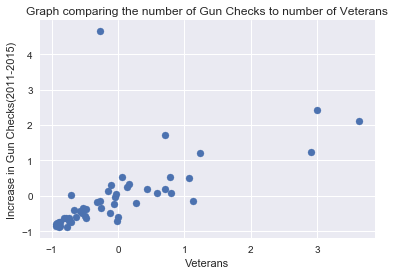

In [7]:
def change_vet_to_float(to_change):
    '''convert number strings with commas in a pandas series to usable numbers'''
    if type(to_change) == str:
        number = ''
        for integer in to_change:
            if integer != ',':
                number += integer
        return int(number)
    return to_change


veterans = census_data.loc['Veterans, 2011-2015']
veterans = veterans.apply(change_vet_to_float)

# Total number of checks from 2011 to 2015
total_checks_2011_2015 = checks_each_year.iloc[:, -6:-1].applymap(change_vet_to_float).sum(axis = 1)

veterans = standardize(veterans)
total_checks = standardize(total_checks_2011_2015)
total_checks.rename('Total Checks from 2011 - 2015', inplace=True)

vets_and_checks = pd.concat([veterans, total_checks], axis=1, join='inner')

print('The correlation between the number of sales and the total number of checks is ', vets_and_checks.iloc[:,0].corr(vets_and_checks.iloc[:,1]))

plt.figure(); plot = plt.scatter(vets_and_checks.iloc[:,0], vets_and_checks.iloc[:,1])
plt.xlabel('Veterans')
plt.ylabel('Increase in Gun Checks(2011-2015)')
plt.title('Graph comparing the number of Gun Checks to number of Veterans')
plt.show()

This shows that there is a positive correlation between the number of veterans in a state and the number of gun checks in
that state, i.e the more the veterans the more the states.

The next step was to find the outlier using the find outlier function.

In [8]:
find_outlier(vets_and_checks)

['Kentucky']

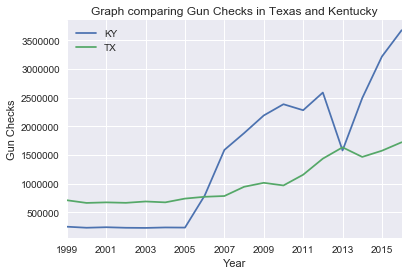

In [9]:
checks_each_year.loc['Kentucky'].plot(label='KY')
checks_each_year.loc['Texas'].plot(label='TX')
plt.xlabel('Year')
plt.ylabel('Gun Checks')
plt.title('Graph comparing Gun Checks in Texas and Kentucky')
plt.legend()
plt.show()

In [10]:
vets_and_checks.loc['Kentucky']

Veterans, 2011-2015             -0.274927
Total Checks from 2011 - 2015    4.663616
Name: Kentucky, dtype: float64

And investigating further, It is now obvious that the number of veterans has nothing to do with the high rate of gun checks in Kentucky, so I decided to remove it and see how the correlation would change.

The correlation between the number of sales and the total number of checks is  0.885816443247


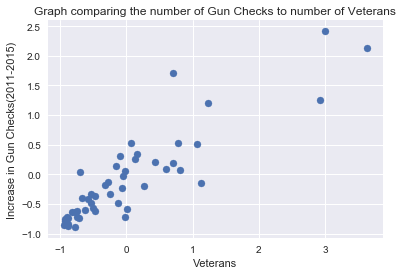

In [11]:
def remove_outlier(dataframe):
    outliers =  find_outlier(dataframe)
    dataframe.drop(outliers, axis=0, inplace=True)
    
remove_outlier(vets_and_checks)
print('The correlation between the number of sales and the total number of checks is ', vets_and_checks.iloc[:,0].corr(vets_and_checks.iloc[:,1]))

plt.figure(); plot = plt.scatter(vets_and_checks.iloc[:,0], vets_and_checks.iloc[:,1])
plt.xlabel('Veterans')
plt.ylabel('Increase in Gun Checks(2011-2015)')
plt.title('Graph comparing the number of Gun Checks to number of Veterans')
plt.show()

So by removing Kentucky, the outlier, from the data, we see that the correlation between the number of veterans and the number of gun checks has increased by 25% to 88.

__Moving on to the next number 3__

How does sales correlate with the number of gun checks?

We first get the total number of sales and compare that with the gun checks of 2013

The correlation between the number of sales and the total number of checks is  0.82975024815


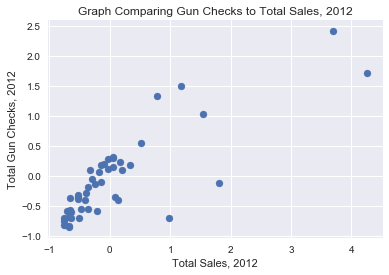

In [12]:
# We put the sales in variables and convert them to integers
merchant_sales = census_data.loc['Total merchant wholesaler sales, 2012 ($1,000)'].apply(change_vet_to_float)
retail_sales = census_data.loc['Total retail sales, 2012 ($1,000)'].apply(change_vet_to_float)
accomodation_sales = census_data.loc['Total accommodation and food services sales, 2012 ($1,000)'].apply(change_vet_to_float)

# Then we sum them up and combine them into a dataframe
total_sales = merchant_sales + retail_sales + accomodation_sales
total_sales = standardize(total_sales)
total_sales.rename('Total Sales, 2012', inplace=True)
total_2012 = checks_each_year['2012']
total_2012 = standardize(total_2012)
total_2012.rename('Total Checks, 2012', inplace=True)

sales_and_checks = pd.concat([total_sales, total_2012], axis=1, join='inner')

# We then use the remove_outlier function to remove any outliers
remove_outlier(sales_and_checks)

# And then check the correlation
print('The correlation between the number of sales and the total number of checks is ', sales_and_checks.iloc[:,0].corr(sales_and_checks.iloc[:,1]))

plt.figure(); plot = plt.scatter(sales_and_checks.iloc[:,0], sales_and_checks.iloc[:,1])
plt.xlabel('Total Sales, 2012')
plt.ylabel('Total Gun Checks, 2012')
plt.title('Graph Comparing Gun Checks to Total Sales, 2012')
plt.show()

__Moving on to the next number 4__

What of where there are a higher number of companies, because that means more people would be employed.

The correlation between the number of and the total number of checks is  0.798357563451


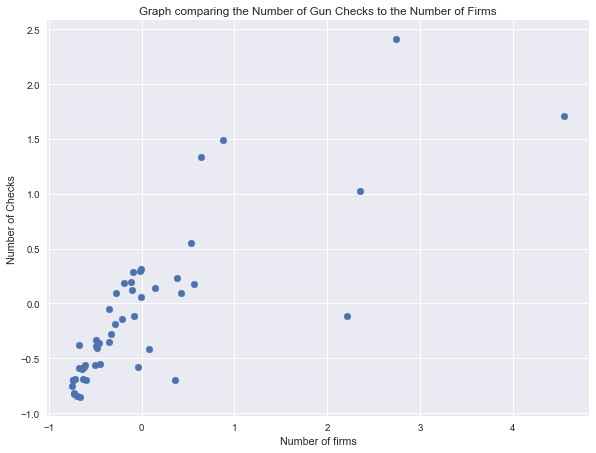

In [13]:
# We put only all firms in a variable and convert it's values to integers
all_firms = census_data.loc['All firms, 2012'].apply(change_vet_to_float)
all_firms = standardize(all_firms)

# We then put the number of firms into a dataframe with the number of gun checks
firms_and_checks = pd.concat([all_firms, total_2012], axis=1, join='inner')

# We then remove outliers
remove_outlier(firms_and_checks)

# We then find correlation and print a graph
print('The correlation between the number of and the total number of checks is ', firms_and_checks.iloc[:,0].corr(firms_and_checks.iloc[:,1]))

plt.figure(figsize=(10, 7.5), dpi=70); plot = plt.scatter(firms_and_checks.iloc[:,0], firms_and_checks.iloc[:,1])
plt.xlabel('Number of firms')
plt.ylabel('Number of Checks')
plt.title('Graph comparing the Number of Gun Checks to the Number of Firms')
plt.show()

And again, we come to the same conclusion, The more the number of firms, the higher the number of gun checks.

So we see that "richer" a state is, as seen in the number of states and in the number of firms, the more people are likely to try to attain guns for whatever reason.

In future, I would still like to confirm some facts e.g In states where there are more house owners, is there a percieved need for more guns or less, and does higher income mean more guns, and also whether a higher level of education means that there would be less guns.